<a href="https://colab.research.google.com/github/pankajr141/Kaggle-ML/blob/master/ubisoft/ubisoft_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount(r'/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
import sys
import cv2
import copy
import matplotlib.pyplot as plt

In [0]:
train_dir = '/content/drive/My Drive/datasets/ubisoft/Train'
train_files = [os.path.join(train_dir, x) for x in os.listdir(train_dir)]
train_files

['/content/drive/My Drive/datasets/ubisoft/Train/Altair 1.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Altair 2.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Altair 3.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Elexis 1.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Altair 4.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Altair 5.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Elexis 2.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Elexis 3.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Elexis 4.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Elexis 5.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Elexis 8.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/Elexis 7.png',
 '/content/drive/My Drive/datasets/ubisoft/Train/cropped4.JPG',
 '/content/drive/My Drive/datasets/ubisoft/Train/cropped1.JPG',
 '/content/drive/My Drive/datasets/ubisoft/Train/cropped2.JPG',
 '/content/drive/My Drive/datasets/ubiso

In [0]:
import json
from shapely.geometry import Polygon

outputdir = '/content/drive/My Drive/datasets/ubisoft/cropped/positive'
for i in range(150):
  train_file = random.choice(train_files)
  jsonfile = os.path.join('/content/drive/My Drive/datasets/ubisoft/Annotations/Train.json')
  annotations = list(json.load(open(jsonfile)).values()) # don't need the dict keys
  annotation = [x for x in annotations if x['filename'] == os.path.basename(train_file)]
  print(annotation[0]['regions'])
  keys = annotation[0]['regions'].keys()
  print(keys)
  buf = 64
  img = cv2.imread(train_file)
  for key in keys:
      x = annotation[0]['regions'][key]['shape_attributes']['all_points_x']
      y = annotation[0]['regions'][key]['shape_attributes']['all_points_y']

      x_min, x_max = np.min(x) - int(buf), np.max(x)
      y_min, y_max = np.min(y) , np.max(y) + int(buf)

      pts1 = np.array(list(zip(x,y)))


      x, y = random.choice(range(x_min, x_max)), random.choice(range(y_min, y_max))
      crop_img = img[y-buf:y, x:x+buf]
      pts2 = np.array([(x, y), (x, y-buf), (x+buf, y-buf), (x+ buf, y), (x, y)])

      p1 = Polygon(pts1)
      p2 = Polygon(pts2)
      if p1.intersects(p2):
          name = os.path.join(outputdir, "random_%d.jpg" % random.choice(range(1000000)))
          cv2.imwrite(name, crop_img)

#       plt.imshow(crop_img)
#       plt.show()
      
#       cv2.polylines(img,[pts1], True, (255, 0, 0), 3)
#       cv2.polylines(img,[pts2], True, (255, 0, 0), 3)


#       plt.imshow(img)
#       plt.show()

{'0': {'shape_attributes': {'name': 'polygon', 'all_points_x': [95, 97, 107, 116, 146, 145, 126, 115, 114, 138, 110, 95], 'all_points_y': [289, 376, 416, 429, 433, 408, 377, 341, 307, 284, 286, 289]}, 'region_attributes': {'name': 'damage'}}}
dict_keys(['0'])
{'0': {'shape_attributes': {'name': 'polygon', 'all_points_x': [356, 349, 362, 366, 374, 356], 'all_points_y': [414, 436, 442, 442, 412, 414]}, 'region_attributes': {'name': 'damage'}}}
dict_keys(['0'])
{'0': {'shape_attributes': {'name': 'polygon', 'all_points_x': [555, 554, 566, 567, 555], 'all_points_y': [354, 372, 379, 359, 354]}, 'region_attributes': {'name': 'damage'}}}
dict_keys(['0'])
{'0': {'shape_attributes': {'name': 'polygon', 'all_points_x': [237, 242, 258, 258, 237], 'all_points_y': [455, 469, 470, 452, 455]}, 'region_attributes': {'name': 'damage'}}, '1': {'shape_attributes': {'name': 'polygon', 'all_points_x': [300, 308, 317, 316, 300], 'all_points_y': [437, 446, 446, 429, 437]}, 'region_attributes': {'name': 'dama

In [0]:
def generate_samples(train_files, outputdir):
  

In [0]:
import random
def save_random_crops(train_files, outputdir):
    filepath = random.choice(train_files)
    img = cv2.imread(filepath)
    x, y = random.choice(range(img.shape[1])), random.choice(range(img.shape[0]))
    crop_img = img[y:y+64, x:x+64]
    name = os.path.join(outputdir, "random_%d.jpg" % random.choice(range(1000000)))
    cv2.imwrite(name, crop_img)

outputdir = '/content/drive/My Drive/datasets/ubisoft/cropped/negative'
if not os.path.exists(outputdir):
  os.makedirs(outputdir)
  
for i in range(40):
  save_random_crops(train_files, outputdir)
  

In [266]:
import numpy as np
import pandas as pd

posdir = '/content/drive/My Drive/datasets/ubisoft/cropped/positive'
negdir = '/content/drive/My Drive/datasets/ubisoft/cropped/negative'

dataset = []
pospaths = [os.path.join(posdir, x) for x in os.listdir(posdir)]
for pospath in pospaths:
  img = cv2.imread(pospath)
  img = cv2.resize(img, (32, 32))
  img = img.reshape(32*32*3)
  dataset.append(img)
df_pos = pd.DataFrame(dataset)
df_pos['label'] = 1

dataset = []
negpaths = [os.path.join(negdir, x) for x in os.listdir(negdir)]
for megpath in negpaths:
  img = cv2.imread(megpath)
  img = cv2.resize(img, (32, 32))
  img = img.reshape(32*32*3)
  dataset.append(img)
df_neg = pd.DataFrame(dataset)
df_neg['label'] = 0

df = pd.concat([df_pos, df_neg], axis=0)
dfLabel = df['label']
df.drop(['label'], inplace=True, axis=1)
print(dfLabel.value_counts())

0    188
1    179
Name: label, dtype: int64


In [0]:
from sklearn import svm
from sklearn import metrics

In [269]:
clf = svm.LinearSVC()
clf.fit(df, dfLabel)
result = clf.predict(df)
metrics.accuracy_score(dfLabel, result)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9918256130790191

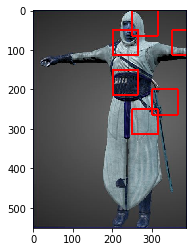

In [284]:
# read the image and define the stepSize and window size 
# (width,height)
image = cv2.imread(train_files[12]) # your image path
tmp = image # for drawing a rectangle
stepSize = 50

window_sizes = [64]

for window_size in window_sizes:
  (w_width, w_height) = (window_size, window_size) # window size
  for x in range(0, image.shape[1] - w_width , stepSize):
     for y in range(0, image.shape[0] - w_height, stepSize):
        try:
          window = image[x:x + w_width, y:y + w_height, :]

          window = cv2.resize(window, (32, 32))
          window_flat = window.reshape(-1, 32*32*3)
          if clf.predict(window_flat):
#               cv2.rectangle(tmp, (x, y), (x + w_width, y + w_height), (255, 0, 0), 3) # draw rectangle on image
              cv2.rectangle(tmp, (y, x), (y + w_height, x + w_width), (255, 0, 0), 3) # draw rectangle on image
#               plt.imshow(window)
#               plt.show()
        except Exception as err:
          pass
# show all windows
plt.imshow(np.array(tmp).astype('uint8'))
plt.show()